In [3]:
# As always, data manipulation
import numpy as np
import pandas as pd

# Some data preprocessing:
from sklearn.preprocessing import MinMaxScaler # Values between 0 and 1
from minisom import MiniSom

# Model metrics: 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score

# Obtain the Dataset
from sklearn.datasets import fetch_openml

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D # 3D visualization

# Use PIL to read images
from PIL import Image

In [4]:
mnist = fetch_openml("mnist_784", version=1)
x, y = mnist["data"], mnist["target"]

In [44]:
#SOM HYPERPARAMETERS
som_grid_rows = 80
som_grid_columns = 80
iterations = 15000
sigma = 6 
learning_rate = 0.1

som = MiniSom(x=som_grid_rows,
              y=som_grid_columns,
              sigma=sigma,
              input_len=x.shape[1],
              learning_rate=learning_rate)

data_arr = np.array(x)
som.random_weights_init(data_arr)
som.train(data_arr,iterations)

In [45]:
labels2 = som.labels_map(data_arr[500:3000], y[500:3000])

In [51]:
colorlist={"1":'blue',
               "2":'green',
               "3":'red',
               "4":'orange',
               "5":'yellow',
               "6":'brown',
               "7":'black',
               "8":'gray',
               "9":'cyan',
               "0":'magenta'}

In [52]:
def draw_pie(dictionary, xpos, ypos, ax=None, size_factor=1):
    dist = list(dictionary.values())
    size = sum(dist)
    keys = list(dictionary.keys())
    if ax is None:
        fig, ax = plt.subplots(figsize=(10,8))
    cumsum = np.cumsum(dist)
    cumsum_norm = cumsum/cumsum[-1]
    pie = [0] + cumsum_norm.tolist()
    i = 0
    for r1, r2 in zip(pie[:-1], pie[1:]):
        angles = np.linspace(2*np.pi*r1, 2*np.pi*r2)
        x = [0] + np.cos(angles).tolist()
        y = [0] + np.sin(angles).tolist()
        
        xy = np.column_stack([x, y])
        ax.scatter([xpos], [ypos], marker=xy, s=size_factor*size, color=colorlist[keys[i]])
        i+=1
    return ax

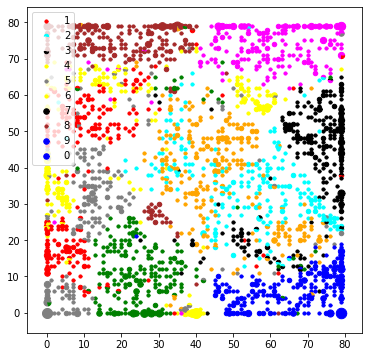

In [55]:
fig, ax = plt.subplots(figsize=(6,6))
list1 = list(labels2.items())
for node in range(len(list1)):
    values =  list1[node]
    d = dict(values[1].items())
    draw_pie(d, values[0][0], values[0][1], ax=ax, size_factor=10)
plt.legend(colorlist)

[((53, 20), Counter({'3': 1})),
 ((79, 24), Counter({'9': 1, '7': 1})),
 ((23, 62), Counter({'5': 1})),
 ((7, 7), Counter({'8': 1})),
 ((3, 56), Counter({'5': 1})),
 ((70, 48), Counter({'7': 3})),
 ((35, 22), Counter({'6': 1})),
 ((77, 12), Counter({'1': 3})),
 ((79, 13), Counter({'1': 3})),
 ((4, 7), Counter({'3': 1})),
 ((71, 4), Counter({'1': 2})),
 ((79, 23), Counter({'7': 1, '9': 1})),
 ((19, 37), Counter({'5': 1})),
 ((40, 0), Counter({'5': 10})),
 ((15, 63), Counter({'5': 2})),
 ((23, 0), Counter({'2': 5})),
 ((28, 53), Counter({'5': 1})),
 ((12, 26), Counter({'8': 1})),
 ((67, 17), Counter({'7': 1})),
 ((62, 70), Counter({'0': 2})),
 ((44, 32), Counter({'9': 1})),
 ((65, 55), Counter({'7': 2})),
 ((76, 48), Counter({'7': 1})),
 ((78, 79), Counter({'0': 4})),
 ((61, 50), Counter({'9': 1})),
 ((78, 74), Counter({'0': 1})),
 ((59, 65), Counter({'0': 1})),
 ((19, 39), Counter({'8': 1})),
 ((77, 24), Counter({'9': 1})),
 ((17, 11), Counter({'2': 1})),
 ((48, 53), Counter({'4': 2})),